In [ ]:
!pip install dicom2nifti

In [ ]:
import dicom2nifti
import nibabel
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir("/content/drive/My Drive/DLMIP/")
os.listdir()

In [ ]:
path_to_dicom = 'SE000001/'
dicom2nifti.convert_directory(path_to_dicom, '.')

In [ ]:
nifti = nibabel.load('201_t2w_tse.nii.gz')
print(nifti)

In [ ]:
nifti.header['qoffset_x']

array(115.27232, dtype=float32)

In [ ]:
image_array = nifti.get_fdata()

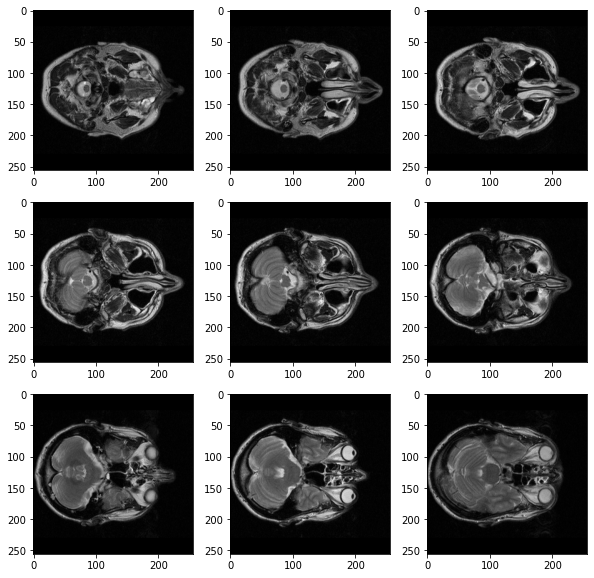

In [ ]:
fig , axis = plt.subplots(3,3,figsize=(10,10))

slice_counter = 0

for i in range(3):
  for j in range(3):
    axis[i][j].imshow(image_array[:,:,slice_counter],cmap='gray')
    slice_counter+=1

In [ ]:
image_array_processed = image_array * (image_array>300)

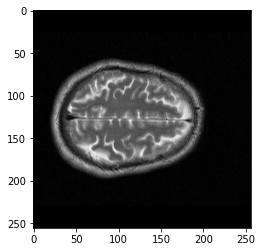

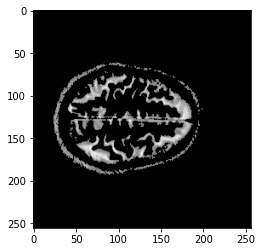

In [ ]:
plt.figure()
plt.imshow(image_array[:,:,20], cmap='gray')
plt.figure()
plt.imshow(image_array_processed[:,:,20], cmap= 'gray')

In [ ]:
processed_nifti = nibabel.Nifti1Image(image_array_processed, nifti.affine)

In [ ]:
nibabel.save(processed_nifti,'201_t2w_tse_processed.nii.gz')

In [ ]:
nifti_2 = nibabel.load('201_t2w_tse_processed.nii.gz')
image_array2 = nifti_2.get_fdata()

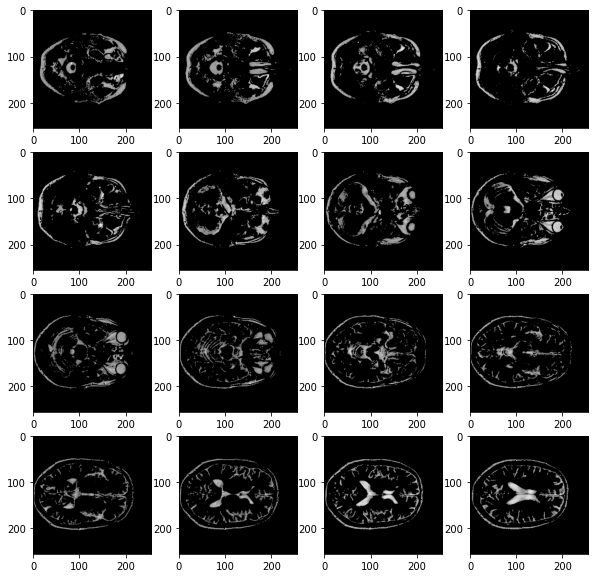

In [ ]:
fig , axis = plt.subplots(4,4,figsize=(10,10))

slice_counter = 0

for i in range(4):
  for j in range(4):
    axis[i][j].imshow(image_array2[:,:,slice_counter],cmap='gray')
    slice_counter+=1